In [1]:
print("Name: Pooja Rawool\nPRN: 1132200081")

Name: Pooja Rawool
PRN: 1132200081


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder


In [3]:
%pwd

'C:\\Users\\RAWOOL'

In [4]:
%cd D:\MSC\Trimester2\LabonML\Datasets

D:\MSC\Trimester2\LabonML\Datasets


In [5]:
%pwd

'D:\\MSC\\Trimester2\\LabonML\\Datasets'

In [6]:
dataset = pd.read_csv('parkinsons_updrs.data')

In [7]:
dataset.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [8]:
dataset.shape

(5875, 22)

In [9]:
x=dataset.drop(['subject#', 'age', 'sex', 'test_time','subject#','motor_UPDRS', 'total_UPDRS'],axis=1)
y=dataset['total_UPDRS']

In [10]:
x.columns

Index(['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [12]:
x_train.shape,y_train.shape

((4112, 16), (4112,))

In [13]:
x_train.head()

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
2172,0.00570,0.000055,0.00284,0.00272,0.00851,0.07213,0.630,0.04068,0.04162,0.05218,0.12203,0.019428,20.381,0.57334,0.71886,0.261710
2617,0.01457,0.000102,0.00651,0.00693,0.01954,0.04137,0.403,0.02042,0.02464,0.03543,0.06126,0.035433,18.090,0.59385,0.75481,0.458990
70,0.00412,0.000024,0.00216,0.00232,0.00649,0.02120,0.197,0.01091,0.01213,0.01852,0.03273,0.007897,24.567,0.44985,0.59345,0.218920
2106,0.00280,0.000017,0.00119,0.00127,0.00357,0.01277,0.129,0.00576,0.00627,0.00987,0.01727,0.010317,28.281,0.41086,0.54318,0.092377
1752,0.00412,0.000022,0.00232,0.00212,0.00695,0.02643,0.230,0.01488,0.01540,0.02138,0.04465,0.014644,19.551,0.46436,0.62182,0.153480


In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4112 entries, 2172 to 2732
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jitter(%)      4112 non-null   float64
 1   Jitter(Abs)    4112 non-null   float64
 2   Jitter:RAP     4112 non-null   float64
 3   Jitter:PPQ5    4112 non-null   float64
 4   Jitter:DDP     4112 non-null   float64
 5   Shimmer        4112 non-null   float64
 6   Shimmer(dB)    4112 non-null   float64
 7   Shimmer:APQ3   4112 non-null   float64
 8   Shimmer:APQ5   4112 non-null   float64
 9   Shimmer:APQ11  4112 non-null   float64
 10  Shimmer:DDA    4112 non-null   float64
 11  NHR            4112 non-null   float64
 12  HNR            4112 non-null   float64
 13  RPDE           4112 non-null   float64
 14  DFA            4112 non-null   float64
 15  PPE            4112 non-null   float64
dtypes: float64(16)
memory usage: 546.1 KB


In [15]:
x_train.describe()

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000
mean,0.006099,0.000044,0.002959,0.003254,0.008878,0.033981,0.310602,0.017126,0.020120,0.027444,0.051378,0.031735,21.674864,0.540518,0.652588,0.219353
std,0.005486,0.000036,0.003070,0.003650,0.009209,0.025628,0.229072,0.013125,0.016568,0.019942,0.039374,0.057288,4.278950,0.100408,0.071361,0.091333
min,0.000850,0.000002,0.000400,0.000450,0.001210,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.799000,0.151020,0.514680,0.021983
25%,0.003580,0.000022,0.001580,0.001830,0.004747,0.019140,0.176000,0.009330,0.010788,0.015668,0.027980,0.011062,19.430250,0.469483,0.595065,0.155938
50%,0.004890,0.000034,0.002250,0.002480,0.006750,0.027635,0.254000,0.013730,0.015965,0.022660,0.041185,0.018475,21.904500,0.541225,0.641270,0.204675
75%,0.006750,0.000053,0.003270,0.003440,0.009805,0.039500,0.363000,0.020472,0.023630,0.032540,0.061408,0.031351,24.428000,0.611533,0.711532,0.265435
max,0.099620,0.000446,0.057540,0.069560,0.172630,0.239150,1.970000,0.162670,0.162460,0.275460,0.488020,0.724050,37.875000,0.935070,0.865600,0.731520


array([[<AxesSubplot:title={'center':'Jitter(%)'}>,
        <AxesSubplot:title={'center':'Jitter(Abs)'}>,
        <AxesSubplot:title={'center':'Jitter:RAP'}>,
        <AxesSubplot:title={'center':'Jitter:PPQ5'}>],
       [<AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'Shimmer'}>,
        <AxesSubplot:title={'center':'Shimmer(dB)'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ3'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ5'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ11'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'DFA'}>,
        <AxesSubplot:title={'center':'PPE'}>]], dtype=object)

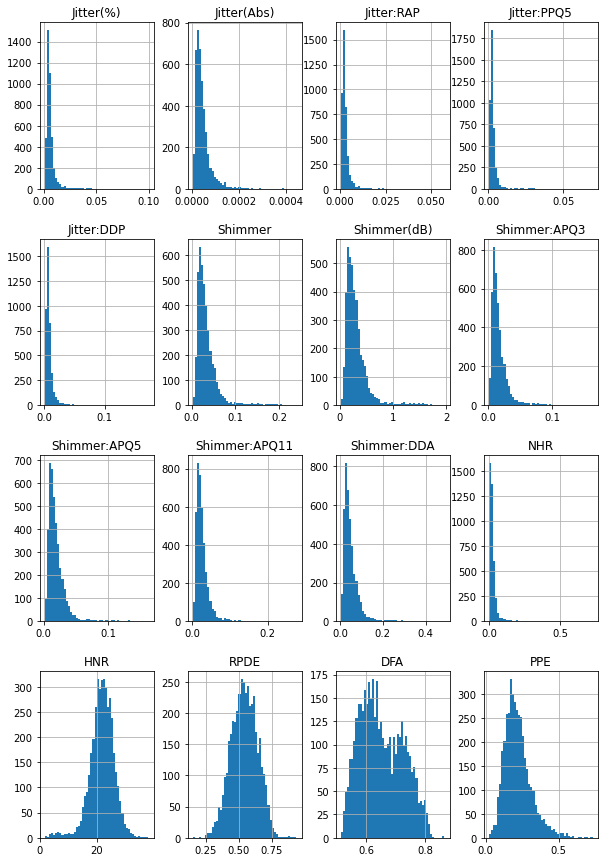

In [16]:
x_train.hist(bins=50,figsize=(10,15))

In [17]:
ds_corr_matrix = x_train.corr()

In [18]:
ds_corr_matrix

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
Jitter(%),1.000000,0.859270,0.983597,0.967588,0.983601,0.701338,0.708571,0.659443,0.685806,0.633650,0.659442,0.827109,-0.671659,0.433379,0.234767,0.716013
Jitter(Abs),0.859270,1.000000,0.835486,0.780835,0.835488,0.638121,0.644210,0.616645,0.609632,0.575052,0.616643,0.693890,-0.700010,0.546729,0.358602,0.782527
Jitter:RAP,0.983597,0.835486,1.000000,0.947010,1.000000,0.669285,0.672792,0.641338,0.647336,0.588150,0.641336,0.791541,-0.633474,0.385909,0.223886,0.659498
Jitter:PPQ5,0.967588,0.780835,0.947010,1.000000,0.947018,0.723504,0.726807,0.671187,0.724374,0.657570,0.671187,0.860273,-0.658285,0.387998,0.187196,0.658227
Jitter:DDP,0.983601,0.835488,1.000000,0.947018,1.000000,0.669279,0.672787,0.641325,0.647328,0.588151,0.641324,0.791538,-0.633474,0.385905,0.223897,0.659509
Shimmer,0.701338,0.638121,0.669285,0.723504,0.669279,1.000000,0.992637,0.979695,0.985417,0.934459,0.979695,0.794986,-0.799750,0.472597,0.144177,0.614384
Shimmer(dB),0.708571,0.644210,0.672792,0.726807,0.672787,0.992637,1.000000,0.967703,0.977288,0.936186,0.967703,0.801715,-0.800291,0.474988,0.134507,0.633241
Shimmer:APQ3,0.659443,0.616645,0.641338,0.671187,0.641325,0.979695,0.967703,1.000000,0.964349,0.885517,1.000000,0.733798,-0.779378,0.440968,0.145427,0.577054
Shimmer:APQ5,0.685806,0.609632,0.647336,0.724374,0.647328,0.985417,0.977288,0.964349,1.000000,0.940356,0.964350,0.795588,-0.787907,0.456152,0.139327,0.590934
Shimmer:APQ11,0.633650,0.575052,0.588150,0.657570,0.588151,0.934459,0.936186,0.885517,0.940356,1.000000,0.885517,0.710197,-0.776087,0.487065,0.186990,0.622706


<AxesSubplot:>

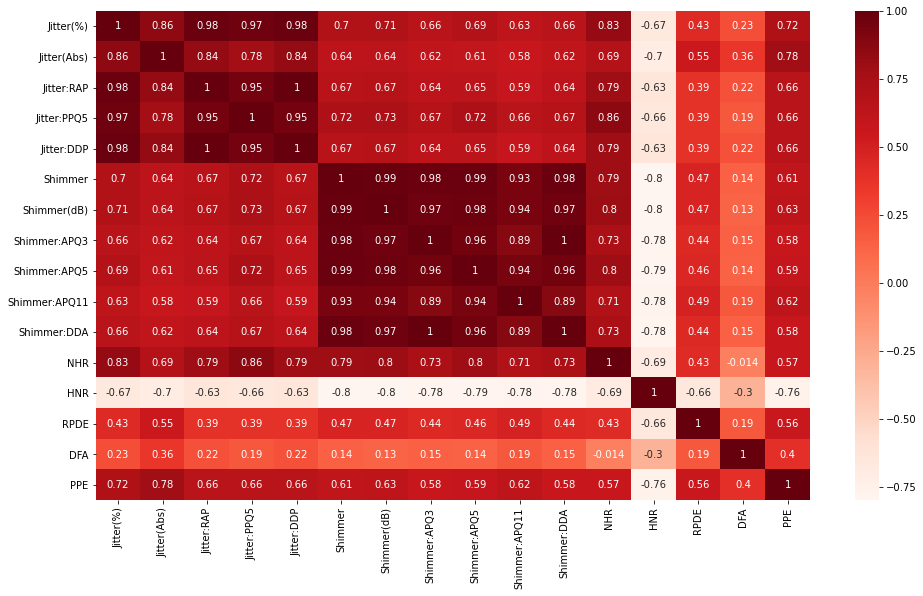

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(x_train.corr(),cbar=True, cmap='Reds',annot=True)

In [20]:
regr=LinearRegression()
regr.fit(x_train, y_train) 
print(regr.intercept_)
print(regr.coef_)

61.744552825872326
[ 1.95044361e+02 -3.10274239e+04 -8.30856450e+04 -1.29126135e+02
  2.77791300e+04  1.02929883e+02 -3.02047472e+00  1.26089712e+03
 -1.36750244e+02  1.04159574e+02 -4.72227792e+02 -4.41648879e+01
 -5.82316019e-01  5.74871863e+00 -4.11764355e+01  2.26717422e+01]


In [21]:
y_pred=regr.predict(x_test)

In [22]:
print(r2_score(y_test,y_pred) )

0.09158534970831766


In [23]:
x=dataset.drop(['subject#', 'age', 'sex', 'test_time','subject#','motor_UPDRS', 'total_UPDRS'],axis=1)
y=dataset['motor_UPDRS']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_train.shape,y_train.shape

((4700, 16), (4700,))

In [26]:
x_train.head()

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
598,0.00493,0.000041,0.00214,0.00278,0.00643,0.04291,0.368,0.02268,0.02892,0.04076,0.06803,0.026969,17.304,0.59679,0.66536,0.23970
4511,0.00330,0.000010,0.00158,0.00153,0.00475,0.02274,0.229,0.01200,0.01291,0.01825,0.03600,0.021930,20.407,0.50141,0.52669,0.23438
5284,0.02251,0.000219,0.01262,0.00902,0.03785,0.05579,0.538,0.02656,0.03037,0.03621,0.07967,0.129720,16.021,0.72480,0.62491,0.35762
1431,0.01150,0.000105,0.00462,0.00581,0.01387,0.03020,0.404,0.01567,0.01755,0.02216,0.04702,0.031666,20.433,0.55557,0.67689,0.31261
3582,0.00603,0.000045,0.00309,0.00307,0.00928,0.10820,0.936,0.06262,0.06365,0.07062,0.18786,0.033073,16.860,0.56374,0.70793,0.24890


In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 598 to 2732
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jitter(%)      4700 non-null   float64
 1   Jitter(Abs)    4700 non-null   float64
 2   Jitter:RAP     4700 non-null   float64
 3   Jitter:PPQ5    4700 non-null   float64
 4   Jitter:DDP     4700 non-null   float64
 5   Shimmer        4700 non-null   float64
 6   Shimmer(dB)    4700 non-null   float64
 7   Shimmer:APQ3   4700 non-null   float64
 8   Shimmer:APQ5   4700 non-null   float64
 9   Shimmer:APQ11  4700 non-null   float64
 10  Shimmer:DDA    4700 non-null   float64
 11  NHR            4700 non-null   float64
 12  HNR            4700 non-null   float64
 13  RPDE           4700 non-null   float64
 14  DFA            4700 non-null   float64
 15  PPE            4700 non-null   float64
dtypes: float64(16)
memory usage: 624.2 KB


In [28]:
regr=LinearRegression()
regr.fit(x_train, y_train) 
print(regr.intercept_)
print(regr.coef_)

45.30123245430063
[ 4.62500442e+02 -5.31026981e+04 -6.61672829e+04 -2.89188489e+02
  2.20640669e+04  1.18477040e+02 -3.73025042e+00 -1.70688751e+03
 -1.55104836e+02  1.01484982e+02  5.24544964e+02 -2.59391120e+01
 -4.21972642e-01  1.74629779e+00 -2.94825613e+01  2.01059168e+01]


In [29]:
print(regr.score(x_test,y_test))

0.08519940471739296


In [30]:
y_pred=regr.predict(x_test)

In [31]:
print(r2_score(y_test,y_pred) )

0.08519940471739296


In [32]:
### World Happiness Report 
dataset1=pd.read_csv("2015.csv")

In [33]:
dataset1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [34]:
dataset2=pd.read_csv("2016.csv")

In [35]:
dataset2.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [36]:
dataset3 = pd.read_csv('2017.csv')

In [37]:
dataset3.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [38]:
d1=dataset1.drop(['Region','Standard Error'],axis=1)

In [39]:
d1

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [40]:
d2=dataset2.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval'],axis=1)

In [41]:
d2

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [42]:
d3=dataset3.drop(['Whisker.high','Whisker.low'],axis=1)

In [43]:
d3.rename(columns={'Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Trust..Government.Corruption.':'Trust (Government Corruption)','Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score','Dystopia.Residual':'Dystopia Residual','Health..Life.Expectancy.':'Health (Life Expectancy)'},inplace=True)

In [44]:
d3

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [45]:
d4=d1.append(d2)

In [46]:
df=d4.append(d3)

In [47]:
df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,Denmark,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024


In [48]:
df.shape

(470, 10)

In [49]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Happiness Rank                 470 non-null    int64  
 2   Happiness Score                470 non-null    float64
 3   Economy (GDP per Capita)       470 non-null    float64
 4   Family                         470 non-null    float64
 5   Health (Life Expectancy)       470 non-null    float64
 6   Freedom                        470 non-null    float64
 7   Trust (Government Corruption)  470 non-null    float64
 8   Generosity                     470 non-null    float64
 9   Dystopia Residual              470 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 40.4+ KB


In [51]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [52]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720


array([[<AxesSubplot:title={'center':'Jitter(%)'}>,
        <AxesSubplot:title={'center':'Jitter(Abs)'}>,
        <AxesSubplot:title={'center':'Jitter:RAP'}>,
        <AxesSubplot:title={'center':'Jitter:PPQ5'}>],
       [<AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'Shimmer'}>,
        <AxesSubplot:title={'center':'Shimmer(dB)'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ3'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ5'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ11'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'DFA'}>,
        <AxesSubplot:title={'center':'PPE'}>]], dtype=object)

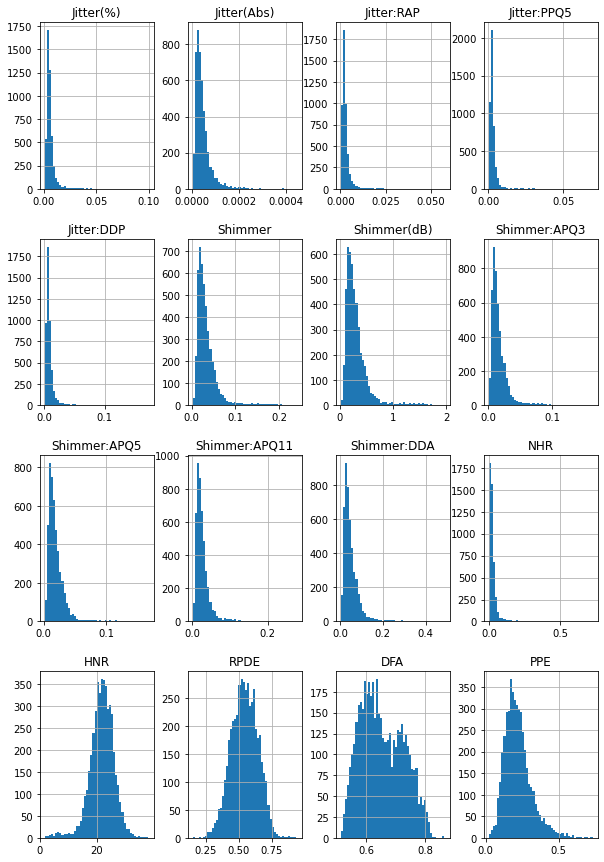

In [53]:
x_train.hist(bins=50,figsize=(10,15))

In [54]:
ds_corr_matrix = x_train.corr()

In [55]:
ds_corr_matrix

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
Jitter(%),1.000000,0.865883,0.983777,0.967549,0.983780,0.700952,0.709490,0.660736,0.684223,0.631125,0.660736,0.826444,-0.673013,0.436103,0.232147,0.719293
Jitter(Abs),0.865883,1.000000,0.842716,0.787998,0.842720,0.638821,0.645788,0.617020,0.610123,0.577164,0.617019,0.695659,-0.700600,0.547606,0.355596,0.783183
Jitter:RAP,0.983777,0.842716,1.000000,0.946945,1.000000,0.668495,0.673381,0.641956,0.645830,0.584936,0.641955,0.792774,-0.634469,0.388694,0.220072,0.663256
Jitter:PPQ5,0.967549,0.787998,0.946945,1.000000,0.946953,0.725640,0.729941,0.675821,0.725985,0.656340,0.675821,0.861238,-0.660794,0.391543,0.183885,0.662144
Jitter:DDP,0.983780,0.842720,1.000000,0.946953,1.000000,0.668496,0.673384,0.641952,0.645829,0.584943,0.641951,0.792773,-0.634474,0.388689,0.220082,0.663266
Shimmer,0.700952,0.638821,0.668495,0.725640,0.668496,1.000000,0.992409,0.980370,0.985348,0.935463,0.980370,0.795591,-0.802762,0.474655,0.139678,0.618791
Shimmer(dB),0.709490,0.645788,0.673381,0.729941,0.673384,0.992409,1.000000,0.968083,0.976371,0.936453,0.968083,0.801058,-0.803266,0.476791,0.130943,0.637414
Shimmer:APQ3,0.660736,0.617020,0.641956,0.675821,0.641952,0.980370,0.968083,1.000000,0.965605,0.887473,1.000000,0.738177,-0.783009,0.442986,0.139540,0.582047
Shimmer:APQ5,0.684223,0.610123,0.645830,0.725985,0.645829,0.985348,0.976371,0.965605,1.000000,0.938648,0.965606,0.798294,-0.789037,0.455173,0.133185,0.593052
Shimmer:APQ11,0.631125,0.577164,0.584936,0.656340,0.584943,0.935463,0.936453,0.887473,0.938648,1.000000,0.887474,0.708131,-0.780098,0.488400,0.183407,0.627181


<AxesSubplot:>

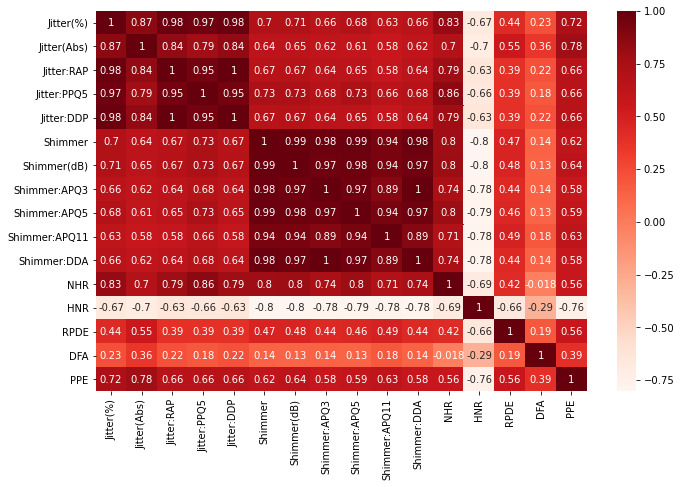

In [56]:
plt.figure(figsize=(11,7))
sns.heatmap(x_train.corr(),cbar=True, cmap='Reds',annot=True)

In [57]:
df["Country"].value_counts()

Palestinian Territories    3
Guatemala                  3
Libya                      3
Netherlands                3
Burundi                    3
                          ..
Swaziland                  1
Oman                       1
Hong Kong S.A.R., China    1
Somaliland Region          1
Djibouti                   1
Name: Country, Length: 166, dtype: int64

In [58]:
x=df.drop(['Happiness Score','Country'],axis=1)
y=df['Happiness Score']

In [59]:
x.shape,y.shape

((470, 8), (470,))

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
x_train.shape,y_train.shape

((376, 8), (376,))

In [62]:
x_train.head()

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
102,103,1.025640,0.800010,0.839470,0.33916,0.045820,0.218540,1.570590
55,56,1.147230,1.257450,0.731280,0.21342,0.010310,0.026410,2.446490
6,7,1.464680,1.029120,0.812310,0.55211,0.299270,0.474160,2.707490
144,145,0.319950,0.630540,0.212970,0.33370,0.125330,0.243530,1.873190
124,125,0.950613,0.570615,0.649547,0.30941,0.251667,0.054009,1.500138


In [63]:
regr=LinearRegression()
regr.fit(x_train, y_train) 
print(regr.intercept_)
print(regr.coef_)

0.0017632120479476043
[-5.47139168e-06  9.99811953e-01  9.99757805e-01  9.99678392e-01
  9.99704813e-01  9.99718127e-01  9.99919201e-01  9.99735872e-01]


In [64]:
y_pred=regr.predict(x_test)

In [65]:
print(r2_score(y_test,y_pred) )

0.9999999306104108
